In [1]:
import os
import unicodedata
import re

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw

# Dados Pokedex

In [2]:
df = pd.read_csv("data/pokemon_dataset.csv")
df.head(4)

,pokedex_number,name,type1,type2,hp,attack_total,defense_total,speed,capture_rate,legendary,generation
0,1,Bulbasaur,Grass,Poison,45,114,114,45,45,False,1
1,2,Ivysaur,Grass,Poison,60,142,143,60,45,False,1
2,3,Venusaur,Grass,Poison,80,182,183,80,45,False,1
3,4,Charmander,Fire,NaN,39,112,93,65,45,False,1


In [3]:
def normalizar_name(row):
    name = str(row["name"]).strip()
    name = unicodedata.normalize(u'NFKD', name).encode('ascii', 'ignore').decode('utf8')
    name = re.sub(r"[^a-zA-Z]+\s", "", name)
    name = re.sub("[^A-Za-z0-9]+", "", name)
    return name.lower()
df["name_norm"] = df.apply(normalizar_name, axis=1)
df.head(5)

,pokedex_number,name,type1,type2,hp,attack_total,defense_total,speed,capture_rate,legendary,generation,name_norm
0,1,Bulbasaur,Grass,Poison,45,114,114,45,45,False,1,bulbasaur
1,2,Ivysaur,Grass,Poison,60,142,143,60,45,False,1,ivysaur
2,3,Venusaur,Grass,Poison,80,182,183,80,45,False,1,venusaur
3,4,Charmander,Fire,NaN,39,112,93,65,45,False,1,charmander
4,5,Charmeleon,Fire,NaN,58,144,123,80,45,False,1,charmeleon


In [4]:
df_info = df[["pokedex_number", "name_norm"]].copy()
df_info.head(3)

,pokedex_number,name_norm
0,1,bulbasaur
1,2,ivysaur
2,3,venusaur


# Dados Imagens

In [5]:
path = "./imagens/img"

## Mapear Diretório

In [6]:
dir_img = os.listdir(path) # mapear diretório

In [ ]:
df_img_columns = ["name", "file", "path"]
data_df_img = [[x.split(".")[0], x, path+"/"+x] for x in dir_img]
data_df_img[0]

## dataset

In [ ]:
df_img = pd.DataFrame(data_df_img, columns=df_img_columns)
df_img.head(5)

In [ ]:
def normalizar_name(row):
    name = str(row["name"]).strip()
    name = unicodedata.normalize(u'NFKD', name).encode('ascii', 'ignore').decode('utf8')
    name = re.sub(r"[^a-zA-Z]+\s", "", name)
    name = re.sub("[^A-Za-z0-9]+", "", name) ## aegislash-blade
    return name.lower()
df_img["name_norm"] = df_img.apply(normalizar_name, axis=1)
df_img.head(5)

# Justar Bases

In [ ]:
df_poke_img = df_info.merge(df_img, how="left", left_on='name_norm', right_on='name_norm')[["pokedex_number", "name_norm", "file", "path"]].copy()
df_poke_img.head()

In [ ]:
selecao = df_poke_img["name_norm"] == "blaziken"
df_poke_img[selecao]

In [12]:
df_poke_img[pd.isnull(df_poke_img).any(axis=1)]
df_poke_img.isnull().sum()

pokedex_number     0
name_norm          0
file              49
path              49
dtype: int64

# Imagem

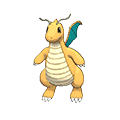

In [134]:
path = df_poke_img.iloc[5]["path"]
path = df_poke_img.sample(1).iloc[0]["path"]
Image.open(path)

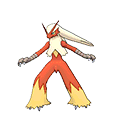

In [13]:
poke = df_poke_img.iloc[383]
poke = df_poke_img.sample(1).iloc[0]
poke = df_poke_img.iloc[255]
if str(poke["path"])!='nan':
    img = Image.open(poke["path"])
else:
    img = Image.new('RGB', (120, 120), color=0)
    d1 = ImageDraw.Draw(img)
    d1.text((20, 50), poke["name_norm"][:13], fill=(255, 0, 0))
    d1.text((20, 60), poke["name_norm"][13:], fill=(255, 0, 0))
img

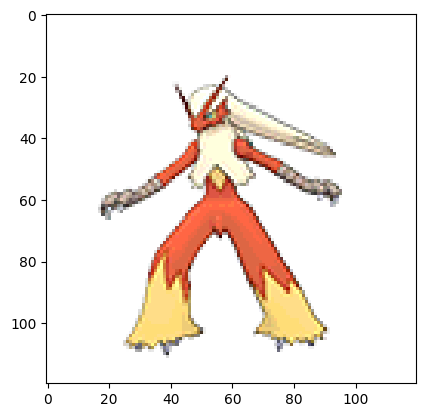

In [14]:
img = mpimg.imread(poke["path"])
imgplot = plt.imshow(img)
plt.show()

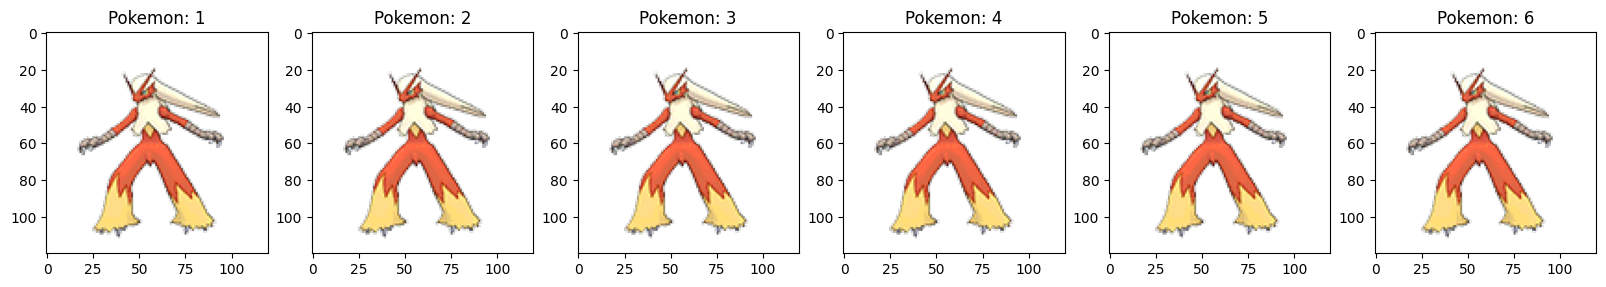

In [15]:
# subplot
[x for x in range(1, 7)]

fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(20)

for i in range(1, 7):
    plt.subplot(1, 6, i)
    # plt.plot(resultados)
    plt.imshow(img)
    plt.title(f"Pokemon: {i}")

# Poke Team

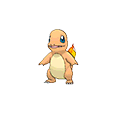

In [92]:
def poke_image(p_data:pd.Series) -> Image:
    """Render the pokemon image."""
    if str(poke["path"])!='nan':
        img = Image.open(poke["path"])
    else:
        img = Image.new('RGB', (120, 120), color=0)
        d1 = ImageDraw.Draw(img)
        d1.text((20, 50), poke["name_norm"][:13], fill=(255, 0, 0))
        d1.text((20, 60), poke["name_norm"][13:], fill=(255, 0, 0))
    return img
poke = df_poke_img.sample(1).iloc[0]
poke_image(poke)

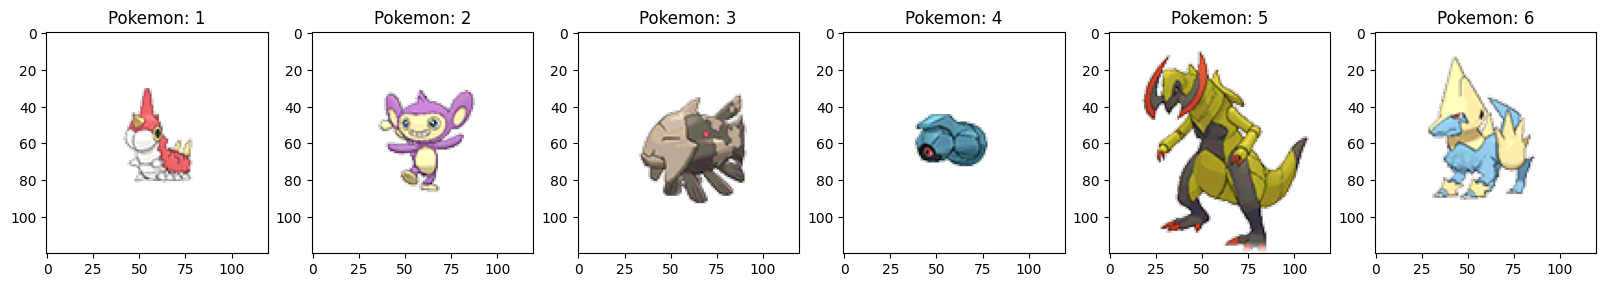

In [106]:
fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(20)

for i in range(1, 7):
    plt.subplot(1, 6, i)
    poke = df_poke_img.sample(1).iloc[0]
    # plt.plot(resultados)
    plt.imshow(poke_image(poke))
    plt.title(f"Pokemon: {i}")